In [2]:
!pip install pycaret[full] --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 945.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Import necessary modules from PyCaret
from pycaret.regression import *
from pycaret.datasets import get_data



In [4]:
# Load the bike dataset from PyCaret's built-in datasets
data = get_data('bike')



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [5]:
# Set up the regression experiment (with 'cnt' as the target column for bike count)
exp = setup(data, target='cnt')



,Description,Value
0,Session id,3342
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 15)"
5,Transformed train set shape,"(12165, 15)"
6,Transformed test set shape,"(5214, 15)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


In [6]:
# Compare models to find the best performing regression model
best_model = compare_models()




,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24.5329,1518.7410,38.9605,0.9537,0.4204,0.3991,5.0640
xgboost,Extreme Gradient Boosting,25.3333,1610.7106,40.1221,0.9509,0.4302,0.4152,0.2880
et,Extra Trees Regressor,25.1181,1714.2399,41.3873,0.9477,0.3249,0.2992,4.2920
lightgbm,Light Gradient Boosting Machine,26.5680,1758.8367,41.9133,0.9464,0.3988,0.3989,0.5550
rf,Random Forest Regressor,27.1020,2027.7410,44.9915,0.9382,0.3439,0.3205,7.1230
dt,Decision Tree Regressor,35.8306,3739.8931,61.0743,0.8861,0.4504,0.3935,0.1640
gbr,Gradient Boosting Regressor,46.0531,4627.5640,68.0031,0.8588,0.6123,0.8214,1.7900
ada,AdaBoost Regressor,88.0328,11569.7393,107.5166,0.6473,1.0664,2.7389,0.9680
knn,K Neighbors Regressor,101.1413,19548.1684,139.7575,0.4041,1.1684,3.4799,0.1090
lr,Linear Regression,107.0069,20548.8315,143.3154,0.3737,1.2213,3.4406,1.3070


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [7]:
# Tune the best model to improve performance
tuned_model = tune_model(best_model)



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26.7835,1754.2343,41.8836,0.9487,0.4061,0.4045
1,26.6223,1822.9315,42.6958,0.9474,0.4543,0.4366
2,25.7211,1724.2339,41.5239,0.9463,0.4051,0.3949
3,25.8902,1664.1057,40.7935,0.9486,0.4010,0.3502
4,25.6158,1572.0444,39.6490,0.9490,0.4297,0.4831
5,27.0575,1846.4158,42.9699,0.9429,0.4436,0.4662
6,27.0584,1795.5415,42.3738,0.9433,0.3711,0.3485
7,26.6761,1724.3929,41.5258,0.9467,0.4387,0.3865
8,25.4918,1725.0452,41.5337,0.9461,0.4031,0.3969


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [8]:
# Predict on the test set or new data
predictions = predict_model(tuned_model)



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,23.7952,1439.9348,37.9465,0.9564,0.4253,0.3942


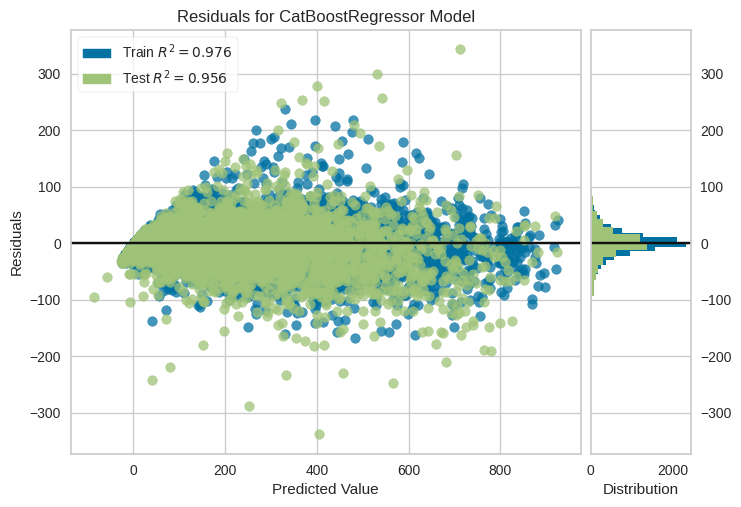

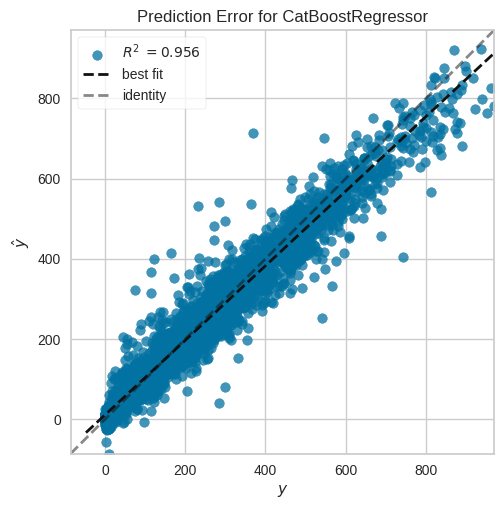

In [9]:
# Evaluate the model performance using different plots
plot_model(tuned_model, plot='residuals')
plot_model(tuned_model, plot='error')



In [10]:
# Save the model for future use
save_model(tuned_model, 'best_bike_rental_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                              'hr', 'holiday', 'weekday',
                                              'workingday', 'weathersit', 'temp',
                                              'atemp', 'hum', 'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['dteday'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['dteday'],
                                     transformer=TargetEncoder(cols=['dteday'],
                                                               handle_missing='return_nan'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegress

In [11]:
# Load the saved model
loaded_model = load_model('best_bike_rental_model')

Transformation Pipeline and Model Successfully Loaded
